In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# reading in the table occupancy sheet to choose the top genes
genesheet = pd.read_csv("TableOccupancy_full.csv")
genelist = list()
genedict = dict()
genedict1 = dict()

In [4]:
# setting the number of genes to be analyzed
top_count = 25

In [5]:
# creating a dictionary for the top genes
genedict = dict((d['Gene'], d['Count']) for d in genesheet.head(top_count)[['Gene', 'Count']].to_dict(orient='records'))

In [6]:
# adding number of references to the dataframe

collist = list()
colref = list()

db_ref = pd.read_excel(f"simplemine_results_1000_31Jan2024.xlsx", comment="#")

for gene in genedict.keys():
    geneindex = db_ref[db_ref["Your Input"] == gene].index[0]
    line = db_ref.at[geneindex, "Reference"]
    collist.append(str(line))
      
for element in collist:
    new = element.split(',')
    if new != ['N.A.']:
        colref.append(len(new))
    else:
        colref.append(0)

In [7]:
df = pd.DataFrame(genedict.keys())

In [8]:
df.columns = ['Gene']

In [9]:
df.head()

,Gene
0,WBGene00021107
1,WBGene00021106
2,WBGene00017069
3,WBGene00016953
4,WBGene00010507


In [10]:
# creating a new column in the df called 'References'
df['References'] = colref

In [11]:
df

,Gene,References
0,WBGene00021107,0
1,WBGene00021106,0
2,WBGene00017069,3
3,WBGene00016953,0
4,WBGene00010507,3
5,WBGene00008010,2
6,WBGene00018199,2
7,WBGene00008447,3
8,WBGene00007675,0
9,WBGene00007454,0


In [12]:
# creating a list of files in the database
filelist = os.listdir("../data")
filelist.remove(".DS_Store") if ".DS_Store" in filelist else None

In [13]:
# changing the working directory
os.chdir("../data")

In [14]:
# creating a list of file names to be iterated over

newcolname = list()
filedict = dict()

for file in filelist:
    db = pd.read_csv(file, comment="#")
    numgene = len(db)
    filedict[file] = numgene

newdict = dict(sorted(filedict.items(), key=lambda item: item[1], reverse=True))

filelist = list(newdict.keys())

In [15]:
# calculating the r-score for each gene
count = 0
N = len(filelist)
arr = list()
r_list = list()
for gene in genedict:
    count += 1
    n = 0
    S_list = []
    T_list = [] 
    for file in filelist:
        db = pd.read_csv(file, comment="#")
        S = 0
        T_list.append(len(db))
        if gene in db["Suggested Match"].values:
            S += 1
        if S > 0:
            n += 1
            
        S_list.append(S)
    arr.append(S_list)
    
    r = 0
    for i in range(n):
        r += S_list[i] / T_list[i]
    
    r_list.append(r)


WBGene00021107
WBGene00021106
WBGene00017069
WBGene00016953
WBGene00010507
WBGene00008010
WBGene00018199
WBGene00008447
WBGene00007675
WBGene00007454
WBGene00007624
WBGene00007489
WBGene00021018
WBGene00022730
WBGene00000473
WBGene00003159
WBGene00017641
WBGene00021019
WBGene00001855
WBGene00007303
WBGene00008862
WBGene00012961
WBGene00016885
WBGene00012452
WBGene00003915
[0.0045958874603721864, 0.0036456161070108992, 0.013241668586923827, 0.013149445763134898, 0.009976451573095802, 0.011685976073118439, 0.008761175346965133, 0.010970467952488227, 0.010784410047816023, 0.010209162072235017, 0.005145095082537422, 0.011387262204695667, 0.008046578540924807, 0.0060559576277003325, 0.002635535515557965, 0.003022661031621521, 0.004368279006351916, 0.006579475564584053, 0.004441022903493154, 0.008689567153781023, 0.009419278641523863, 0.006491708845175628, 0.007743349284588168, 0.007075840501525988, 0.006883836608621859]


In [16]:
df['r'] = r_list

In [17]:
df.sort_values(by='r', ascending=False, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,Gene,References,r
0,WBGene00017069,3,0.013242
1,WBGene00016953,0,0.013149
2,WBGene00008010,2,0.011686
3,WBGene00007489,1,0.011387
4,WBGene00008447,3,0.010970
5,WBGene00007675,0,0.010784
6,WBGene00007454,0,0.010209
7,WBGene00010507,3,0.009976
8,WBGene00008862,1,0.009419
9,WBGene00018199,2,0.008761


In [18]:
genes = df['Gene']


In [19]:
os.chdir("../code")
wormbase = pd.read_csv('Wormbase_Gene_Sanitizer_Database_DownloadedOn_10-30-2023.txt', comment="#", sep="\t")

In [20]:
new_names = []
for gene in genes:
    result = wormbase.index[wormbase["Public Name For"] == gene].item()
    new_names.append(wormbase.iloc[result, 0])

['timm-17B.2', 'C55C3.3', 'C38D9.2', 'C09G5.7', 'E01G4.5', 'C18D4.6', 'C08F11.7', 'K02E2.6', 'F15D4.5', 'F39E9.7', 'rnh-1.3', 'W04B5.1', 'fbxb-97', 'Y17D7B.4', 'pan-1', 'W04B5.2', 'Y47H10A.5', 'ZK402.3', 'hrde-1', 'W09B7.2', 'hil-4', 'csr-1', 'W09B7.1', 'mcm-7', 'cey-2']


In [21]:
df['Gene'] = new_names

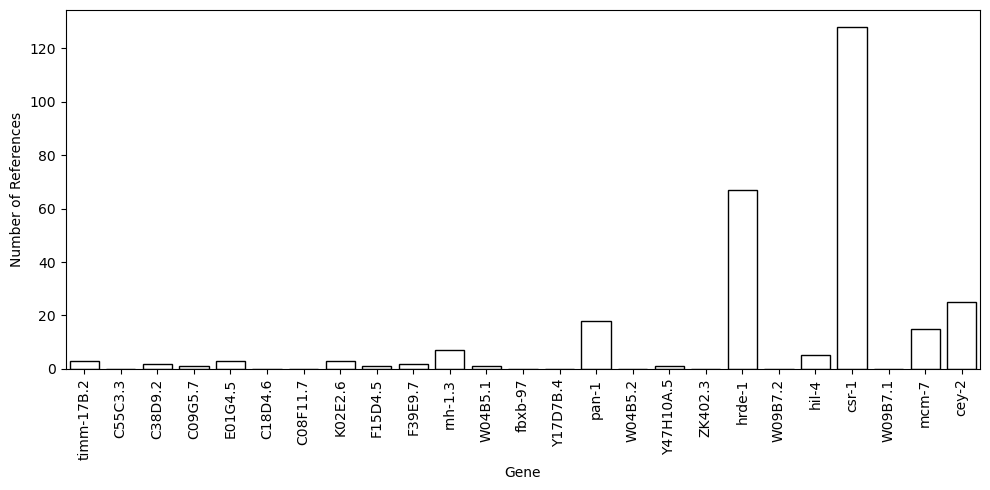

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Gene', y='References', data=df, color='white', edgecolor='black')

plt.xlabel('Gene')
plt.ylabel('Number of References')
plt.xticks(rotation=90)

plt.tight_layout()
